In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [61]:
data=pd.read_csv(r"C:\Users\Mansi Nayyar\OneDrive\Desktop\saloni\data mining\air_quality_index.csv")

In [62]:
data.isna().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    233
pollutant_max    233
pollutant_avg    233
dtype: int64

In [63]:
data.dropna(inplace=True)
data.isna().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [64]:
data.drop(data[data['pollutant_id']!='NO2'].index,inplace=True)

In [65]:
df = data.groupby(['city','pollutant_id']).agg({'pollutant_min': 'min', 'pollutant_max': 'max'})
df['pollutant_avg'] = (df['pollutant_max'] + df['pollutant_min']) / 2

In [66]:
df

,,pollutant_min,pollutant_max,pollutant_avg
city,pollutant_id,,,
Agartala,NO2,4.0,6.0,5.0
Agra,NO2,1.0,184.0,92.5
Ahmedabad,NO2,13.0,110.0,61.5
Ahmednagar,NO2,19.0,61.0,40.0
Ajmer,NO2,13.0,68.0,40.5
...,...,...,...,...
Virar,NO2,7.0,42.0,24.5
Visakhapatnam,NO2,35.0,60.0,47.5
Vrindavan,NO2,2.0,3.0,2.5


In [67]:
bins = [0,40,80,180,280, np.inf]
categories = ['very healthy', 'healthy', 'moderate', 'unhealthy', 'very unhealthy']

In [68]:
df['pollutant_level'] = pd.cut(df['pollutant_avg'], bins=bins, labels=categories, right=False)

In [69]:
df

,,pollutant_min,pollutant_max,pollutant_avg,pollutant_level
city,pollutant_id,,,,
Agartala,NO2,4.0,6.0,5.0,very healthy
Agra,NO2,1.0,184.0,92.5,moderate
Ahmedabad,NO2,13.0,110.0,61.5,healthy
Ahmednagar,NO2,19.0,61.0,40.0,healthy
Ajmer,NO2,13.0,68.0,40.5,healthy
...,...,...,...,...,...
Virar,NO2,7.0,42.0,24.5,very healthy
Visakhapatnam,NO2,35.0,60.0,47.5,healthy
Vrindavan,NO2,2.0,3.0,2.5,very healthy


In [70]:
X = df[['pollutant_min', 'pollutant_max', 'pollutant_avg']]
y = df['pollutant_level']

In [71]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a Gaussian Naive Bayes classifier.
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier on the training data.
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data using the trained classifier.
y_pred = nb_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9361702127659575


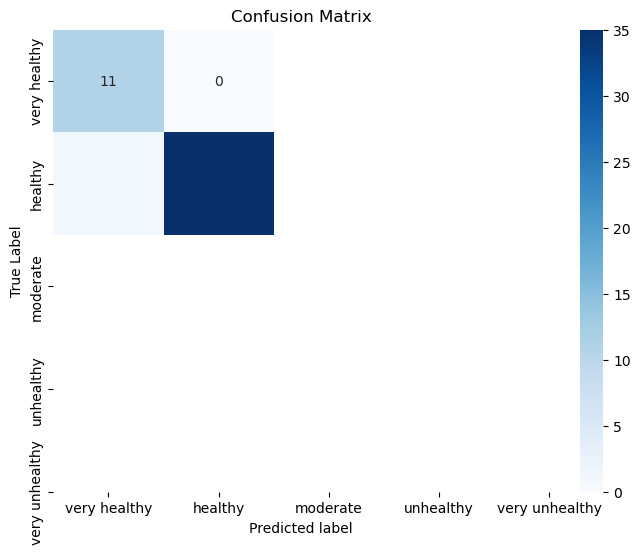

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
con_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='g', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Test the classifier
y_pred = knn.predict(X_test)

In [74]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9787234042553191


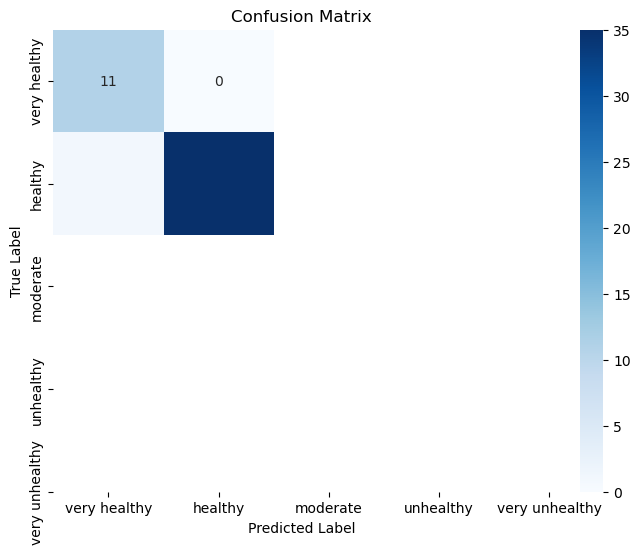

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()